In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.plotly as py
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [19]:
import os
print(os.listdir("C:/Users/Avinash/Desktop/DS Project/Zomato/Data"))

['Country-Code.xlsx', 'file1.json', 'file2.json', 'file3.json', 'file4.json', 'file5.json', 'zomato.csv']


In [39]:
df_train=pd.read_csv("C:/Users/Avinash/Desktop/DS Project/Zomato/Data/zomato.csv",encoding='latin-1')
df_train['rating_cat'] = df_train['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
df_train.rename(columns = {'Aggregate rating':'rating_num', 'Has Table booking': 'Book', 'Has Online delivery': 'On_deliver', 'Is delivering now':'Cur_deliver', 
                          'Switch to order menu' : 'Switch_menu', 'Average Cost for two' : 'Avg_cost_two', 'Price range' : 'Pr_range'}, inplace = True)
df_train.drop(['Rating color', 'Rating text'], axis = 1 ,inplace= True)

print('Original Train Row: ', df_train.shape[0])

df_train = df_train.loc[df_train.rating_cat != -1, :].copy()
print('Train Row : ', df_train.shape[0])

Original Train Row:  9551
Train Row :  7403


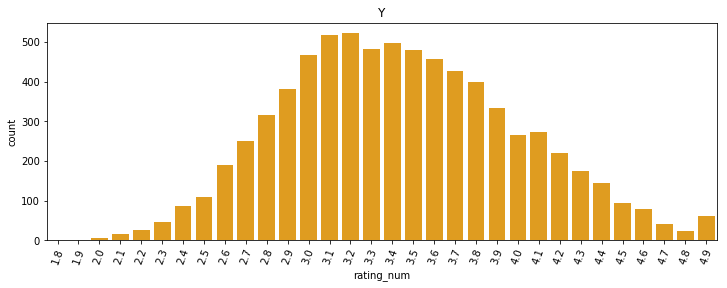

In [59]:
rating = ['rating_num','rating_cat']

f, ax = plt.subplots(1,1,figsize=(12,4))
sns.countplot(df_train['rating_num'], ax=ax ,color = 'orange')
ax.tick_params('x',rotation=70)
ax.set_title('Y')
plt.show()

In [55]:
print('ID# /Name# ')
df_train[['Restaurant ID','Restaurant Name']].apply(pd.Series.nunique,axis=0)

ID# /Name# 


Restaurant ID      7403
Restaurant Name    5711
dtype: int64

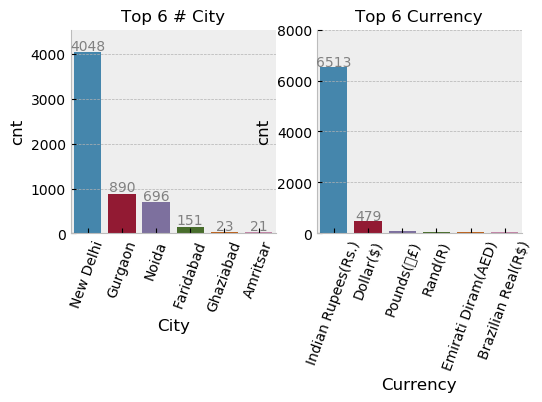

City #  141
Currency #  12
Country Code #  15


In [171]:
with plt.style.context('bmh'): #using bmh style 
    f=plt.figure(figsize=(9,9))
    
    ax=plt.subplot2grid((3,3),(2,0))    #subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)
    cnt=df_train['City'].value_counts().reset_index()  #count the number of the city and use the reset() if we dont want to save it has column		
    cnt.rename(columns={'index':'City','City':'cnt'},inplace=True) #changing the dataframe attribute values
    
    sns.barplot(x='City',y='cnt',data=cnt.head(6),ax=ax) #Ploting the barplot
    
    ax.tick_params(axis='x',rotation=70)   #The labels are roatated by 70
        
    ax.set_title('Top 6 # City',size=12)   #Setting the chart title
    
    ax.set_ylim(0,cnt['cnt'].head(1).values+500) #setting the limit of y axis from 0 to maxmium limit+50
   


    for i,val in enumerate(cnt['cnt'].head(6)):
        ax.text(i,val+50,val,color='grey',ha='center') 
        #positioning the total text at the center of the bar
        #val +50 = the gap between the value and the bar / val= value of the city /color of the text/ ha postion
        
    ax=plt.subplot2grid((3,3),(2,1)) #subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)
    cnt=df_train['Currency'].value_counts().reset_index()  
    cnt.rename(columns={'index':'Currency','Currency':'cnt'}, inplace=True)
    #print(cnt)
    
    sns.barplot(x='Currency',y='cnt',data=cnt.head(6),ax=ax)
    ax.tick_params(axis='x',rotation=70)
    ax.set_title("Top 6 Currency",size=12)
    
    ax.set_ylim([0,8000])
    
    for i,val in enumerate(cnt['cnt'].head(2)):
        ax.text(i, val+50, val, color = 'grey', ha = 'center')
    
    sns.despine(top=True,right=True)    #Remove the top and right spines
    plt.show()
    
    print('City # ', df_train['City'].nunique())
    print('Currency # ', df_train['Currency'].nunique())
    print('Country Code # ', df_train['Country Code'].nunique())
    

In [192]:
tr_USA=df_train.loc[df_train['Country Code']==216,['Latitude','Longitude']]

map_F=folium.Map(location=[35,-92],zoom_start=4)
for i,(lat,lon) in enumerate(tr_USA.values):folium.Marker([lat,lon]).add_to(map_F)
map_F

# City New Delhi

In [246]:
df_train=pd.read_csv("C:/Users/Avinash/Desktop/DS Project/Zomato/Data/zomato.csv",encoding='latin-1')
df_train['rating_cat'] = df_train['Rating text'].map({'Not rated': -1, 'Poor':0, 'Average':2, 'Good':3, 'Very Good':4, 'Excellent':5})
df_train.rename(columns = {'Aggregate rating':'rating_num', 'Has Table booking': 'Book', 'Has Online delivery': 'On_deliver', 'Is delivering now':'Cur_deliver', 
                          'Switch to order menu' : 'Switch_menu', 'Average Cost for two' : 'Avg_cost_two', 'Price range' : 'Pr_range'}, inplace = True)
df_train.drop(['Rating color', 'Rating text'], axis = 1 ,inplace= True)

df_test=df_train.loc[df_train.rating_cat==-1,:].copy()
df_train=df_train.loc[df_train.rating_cat!=-1,:].copy()

df_city=df_train.loc[(df_train['City']=='New Delhi')&(df_train['Country Code']==1),:]
df_city.drop(['Country Code', 'City', 'Locality Verbose', 'Currency'], axis = 1, inplace = True)
df_city = df_city.loc[df_city['Longitude'] != 0, :]
#print(df_city.head(5))

C:\Users\Avinash\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [247]:
tmp = df_city['rating_num'].map(np.round)

print('Round Values')
print(((tmp-df_city['rating_cat']).map(np.round)).value_counts())

Round Values
 1.0    3490
 0.0     378
 2.0      96
-1.0      11
dtype: int64


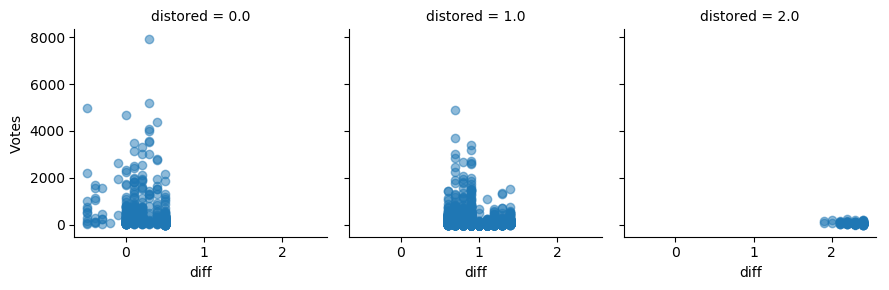

In [248]:
sys_check= df_city[['rating_num','rating_cat','Votes']].copy()
sys_check['diff']=sys_check['rating_num']-sys_check['rating_cat']
sys_check['distored']=(df_city['rating_num']-df_city['rating_cat']).map(np.round)

g=sns.FacetGrid(data=sys_check,col='distored')
g=g.map(plt.scatter,'diff','Votes',alpha=0.5)
plt.show()

In [249]:
df_city=df_city.loc[sys_check['distored']!=2,:]
df_city['rating_cat'] = df_city['rating_num'].round(0).astype(int)

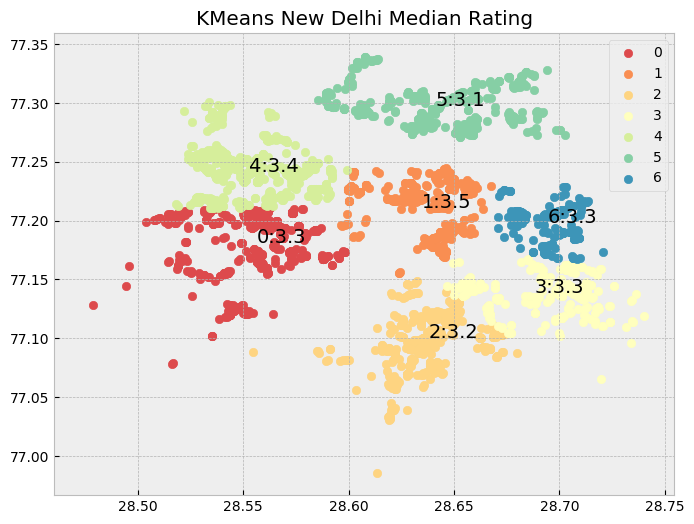

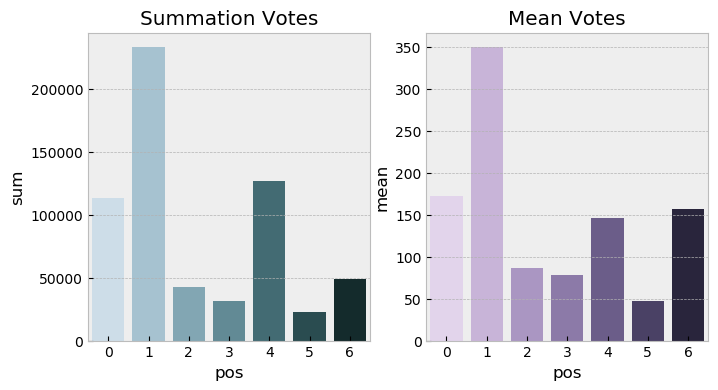

In [264]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=7,random_state=0).fit(df_city[['Longitude','Latitude']])
df_city['pos']=kmeans.labels_
pop_local = df_city.groupby('pos')['Longitude', 'Latitude', 'rating_num'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'rating_num':np.median}).reset_index()
#print(pop_local)

with plt.style.context('bmh',after_reset=True):
    pal=sns.color_palette('Spectral',7)
    plt.figure(figsize=(8,6))
    for i in range(7):
        ix=df_city.pos==i
        plt.scatter(df_city.loc[ix,'Latitude'],df_city.loc[ix,'Longitude'],color=pal[i],label=str(i))
        plt.text(pop_local.loc[i,'Latitude'],pop_local.loc[i,'Longitude'],str(i)+':'+str(pop_local.loc[i,'rating_num'].round(2)),fontsize=14,color='black')
        
    plt.title("KMeans New Delhi Median Rating")
    plt.legend()
    plt.show()
        
    votes_area=df_city.groupby('pos').agg({'Votes':[np.sum, np.mean]})
    #print(votes_area)
    votes_area.columns=votes_area.columns.droplevel(0)
    #print(votes_area)
    votes_area.reset_index(inplace = True)
    plt.figure(figsize=(8,4))
    ax=plt.subplot(1,2,1)
    sns.barplot(x = 'pos', y = 'sum', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 2.4, rot = .1), ax = ax)
    ax.set_title('Summation Votes')

    ax = plt.subplot(1,2,2)
    sns.barplot(x = 'pos', y = 'mean', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 3, rot = .1), ax = ax)
    ax.set_title('Mean Votes')
    plt.show()
        
    
        
    
        

        